In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import make_regression
x ,y = make_regression(n_samples= 1000 , n_features = 2 , n_targets=1 , noise=3)

In [10]:
x = pd.DataFrame(x)

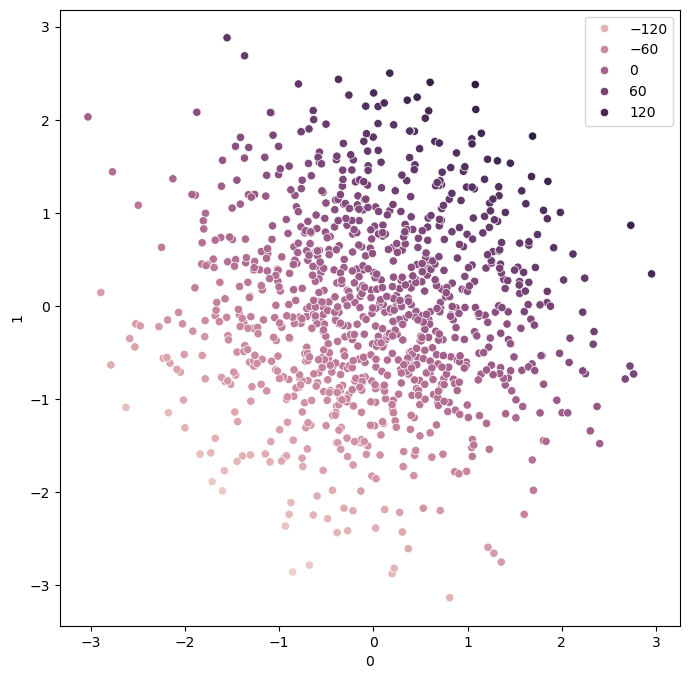

In [20]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = x[0],y = x[1] , hue = y)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size= 0.3 , random_state=1)

In [26]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model

SVR(kernel='linear')

In [29]:
model.fit(x_train,y_train)

SVR(kernel='linear')

In [32]:
y_pred = model.predict(x_test)

In [35]:
print(f"the training is {model.score(x_train,y_train)*100:.2f}")

the training is 99.75


In [38]:
model.coef_

array([[32.39150877, 47.30077553]])

In [52]:
from sklearn.metrics import r2_score
print(f"accuraccy is : {r2_score(y_test,y_pred)*100:.2f}")


accuraccy is : 99.71


In [57]:
from sklearn.model_selection import GridSearchCV
param = {'C':[1 , 2 , 5 ,10,20 ,50,100],
         'gamma' : [ 1 , 0.1 , 0.2 , 0.5  , 0.001 , 0.003],
         'kernel' : [ 'linear' ]} 
model_2 = GridSearchCV(SVR() , param_grid= param , cv=5 , verbose= 2)
model_2

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 5, 10, 20, 50, 100],
                         'gamma': [1, 0.1, 0.2, 0.5, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=2)

In [60]:
model_2.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.2, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.2, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 5, 10, 20, 50, 100],
                         'gamma': [1, 0.1, 0.2, 0.5, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=2)

In [75]:
final_model = model_2.best_estimator_
final_model

SVR(C=20, gamma=1, kernel='linear')

In [66]:
model_2.best_score_

0.9974286262331453

In [77]:
y_pred_cv = final_model.predict(x_test)

In [81]:
print(f"accuraccy is : {r2_score(y_test,y_pred_cv)*100:.2f}")


accuraccy is : 99.72
